<a href="https://colab.research.google.com/github/Achraf80/Image_Mining/blob/main/Ait_Laydi_Achraf_AtelierCBIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from matplotlib import image
# load all images in a directory
loaded_images = list()
# On suppose que la base d'images est dans le dossier "obj_decoys" sur votre Google Drive
# Il faut charger Drive dans Colab

path='/content/drive/MyDrive/Image Mining/obj_decoys'
for filename in listdir(path):
	# load image
	img_data = image.imread(path+'/' + filename)
	# store loaded image
	loaded_images.append(img_data)
	# Activer l'instruction ci-dessus pour afficher les nom de images et les tailles
  # print(' %s %s ' % (filename, img_data.shape))

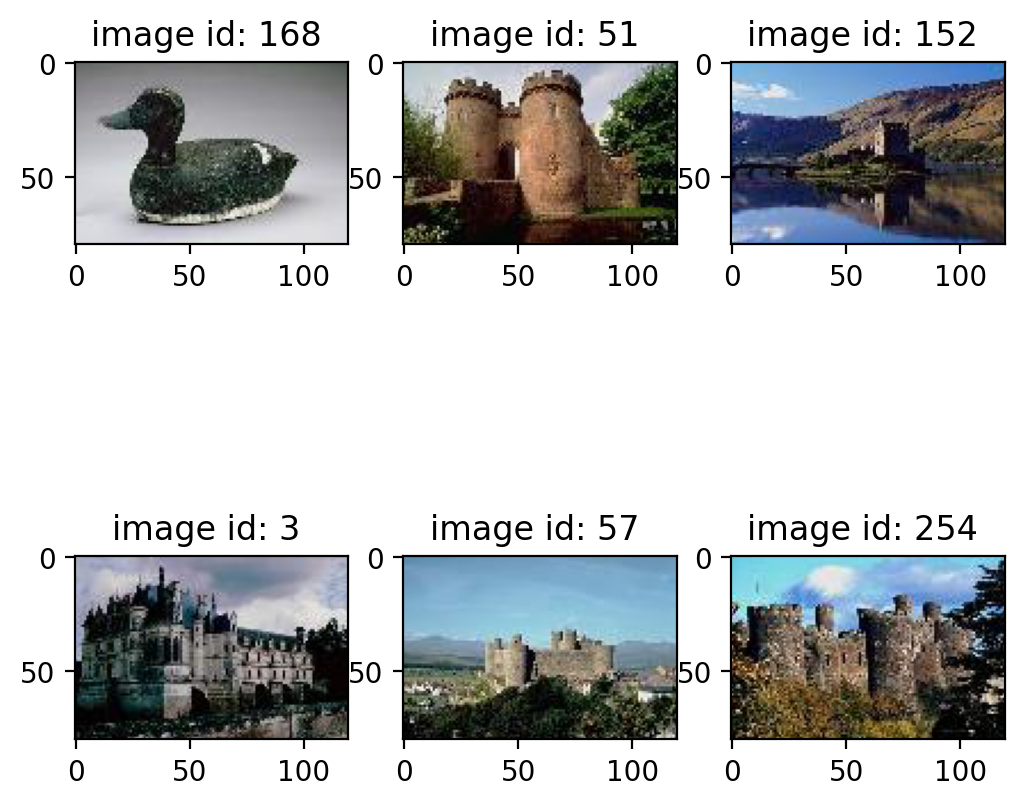

In [ ]:
# Afficher les 6 premières images
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 6), dpi=200)
import random
id=random.sample(range(270), 6)
for i in range(6):
  ax1 = fig.add_subplot(2, 3, i+1)
  ax1.imshow(loaded_images[id[i]])
  ax1.set_title('image id: %s '% (id[i]))

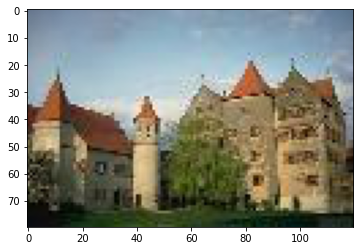

In [ ]:
img_requete = image.imread('/content/drive/MyDrive/Image Mining/ImageRequete.jpeg')
plt.imshow(img_requete) 

<h2>Distance Euclidienne</h2>

In [ ]:
# Comparer les pixels des deux images utilisant une distance euculidienne
import scipy.spatial.distance as dist
import numpy as np
# penser à utiliser un dictionnaire pour garder les indices aprés tri
from PIL import Image

In [ ]:
import numpy as np
distances = {}
for i in range (len(loaded_images)):
    AllimgFlat = loaded_images[i].flatten()
    imgFlat = img_requete.flatten()
    distances[i] = dist.euclidean(AllimgFlat,imgFlat)
distances=sorted([(v,k) for (k,v) in distances.items()])
#print(distances)

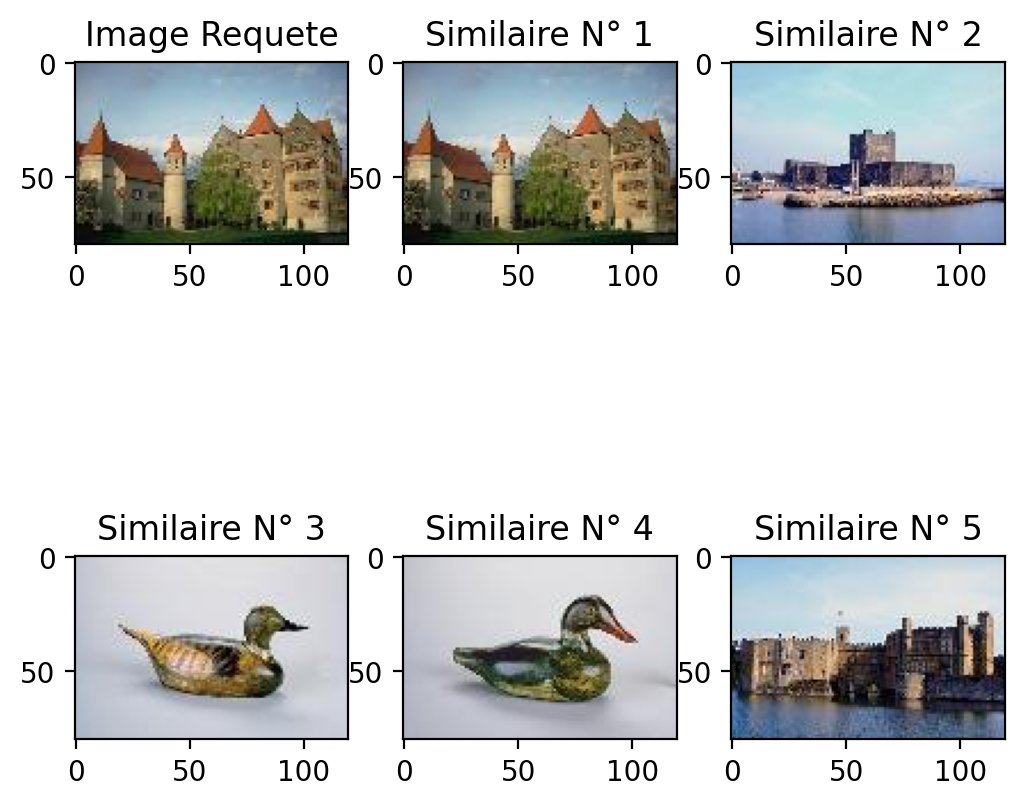

In [ ]:
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')
for i in range(5):
  ax1 = fig.add_subplot(2, 3, i+2)
  ax1.imshow(loaded_images[distances[i][1]])
  ax1.set_title('Similaire N° %s' %(i+1))

<h2>Color Moment</h2>

In [ ]:
import numpy as np

def color_Moments(img):
    img=np.reshape(img,(-1,3))
    mean=np.mean(img,axis=0)
    std=np.std(img,axis=0)
    colorFeatures=[mean[0],std[0],mean[1],std[1],mean[2],std[2]]
    return colorFeatures


In [ ]:
def CBIR_Indexation():
    length=len(loaded_images)
    features=np.zeros((length,6))
    for i in range(length):
        features[i]=color_Moments(loaded_images[i])
    return features
index_Matrix = CBIR_Indexation()
print(index_Matrix.shape)

(270, 6)


In [ ]:
def CBIR_Recherche(Imreq,ind_Matrix):
    distances={}
    for i in range(len(loaded_images)):
        distances[i]=dist.euclidean(Imreq,ind_Matrix[i])
    distances=sorted([(v,k) for (v,k) in distances.items()])
    return distances

In [ ]:
img_requete = image.imread('/content/drive/MyDrive/Image Mining/ImageRequete.jpeg')
#plt.imshow(img_requete) 
distanes_CBIR=CBIR_Recherche(color_Moments(img_requete),index_Matrix)
print(distanes_CBIR)

[(0, 44.03804235872183), (1, 22.53711438475728), (2, 52.855441150666074), (3, 57.85153224900186), (4, 74.34226099808795), (5, 42.87288684700932), (6, 21.112907862669157), (7, 58.407190791938824), (8, 74.38990949276874), (9, 48.54729396255148), (10, 55.032633527462295), (11, 42.209570811559786), (12, 81.77499586529532), (13, 36.89516899052387), (14, 24.43781653726964), (15, 32.67486468379689), (16, 64.7018281631438), (17, 47.13865826505287), (18, 34.7641958097662), (19, 33.25378061206385), (20, 24.37492008760132), (21, 32.705893533744884), (22, 86.4155218336236), (23, 33.472171947361986), (24, 34.9471034653389), (25, 22.32844902597854), (26, 65.81911574671598), (27, 15.757864702614983), (28, 14.480246207961176), (29, 41.84621905348258), (30, 16.949876939594233), (31, 27.210504332954848), (32, 63.82665390550207), (33, 64.51074604736624), (34, 16.944184873975455), (35, 85.12738597172262), (36, 49.21427823825769), (37, 34.37280487993583), (38, 32.89437428122646), (39, 22.41525988180545), (

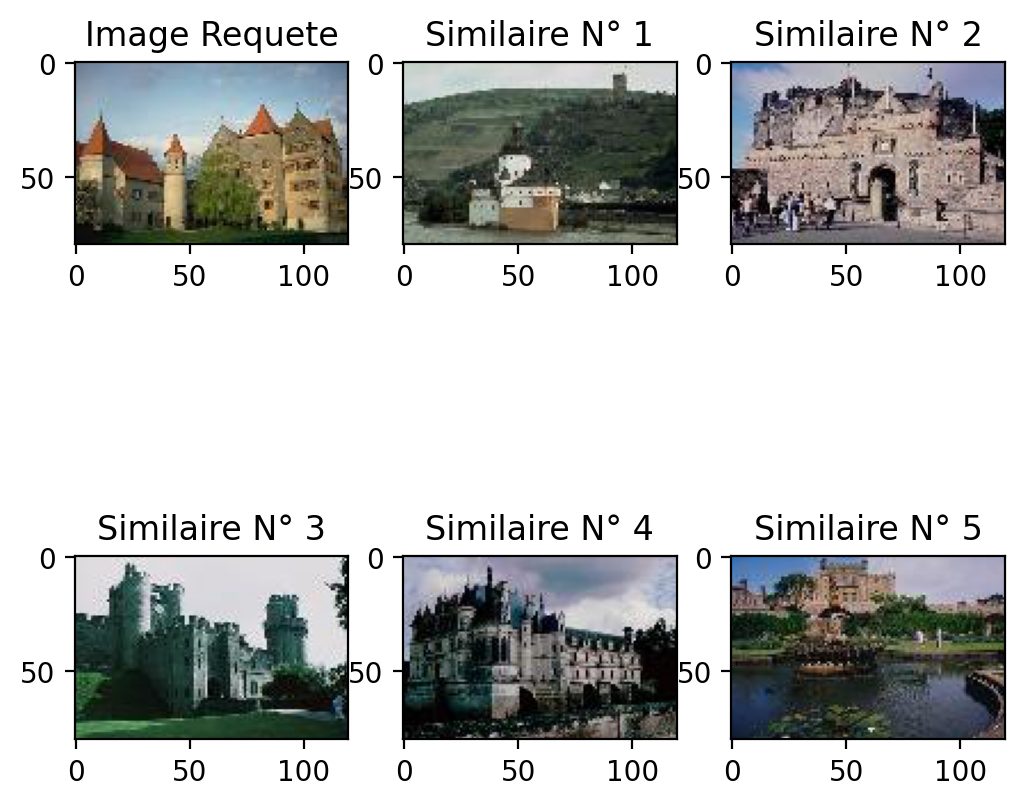

In [ ]:
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')
for i in range(5):
    ax1 = fig.add_subplot(2, 3, i+2)
    ax1.imshow(loaded_images[distanes_CBIR[i][0]])
    ax1.set_title('Similaire N° %s' %(i+1))

<h2>L'Histogramme</h2>



In [ ]:
import cv2
import numpy as np 

def vect_desc_his(img):
  vercteurDiscriptive = []
  imgHsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  img_h = imgHsv[:,:,0]
  img_s = imgHsv[:,:,1]
  img_v = imgHsv[:,:,2] 
  hist_h = cv2.calcHist([img_h],[0],None, [8],[0,256])
  hist_s = cv2.calcHist([img_s],[0],None, [16],[0,256])
  hist_v = cv2.calcHist([img_v],[0],None, [16],[0,256])
  for i in range(8):
     vercteurDiscriptive.append(hist_h[i][0])
  for i in range(16):
     vercteurDiscriptive.append(hist_s[i][0])
  for i in range(16):
     vercteurDiscriptive.append(hist_v[i][0])
  return vercteurDiscriptive


In [ ]:
def getFeatures(img):
    col_Feat = color_Moments(img)
    hist_Feat = vect_desc_his(img)
    feat = []
    for i in col_Feat:
        feat.append(i)
    for i in hist_Feat:
        feat.append(i)
    return feat
f = getFeatures(img_requete)
print(len(f))

46


In [ ]:
def CBIR_Indexation_allFeatures():
    allFeatures = list()
    
    for i in range(len(loaded_images)):
        imgFeat = []
        for ele in getFeatures(loaded_images[i]):
            imgFeat.append(ele)
            
        allFeatures.append(imgFeat)
    return allFeatures

In [ ]:
index_Matrix_allFe = CBIR_Indexation_allFeatures()
row = len(index_Matrix_allFe)
column = len(index_Matrix_allFe[0])
print(f'({row}, {column})')

(270, 46)


In [ ]:
def CBIR_Recherche_allFeatures(Imreq, index_Matrix_allFe):
    allDistances = list()
    aFeatures = getFeatures(Imreq)
    for im in index_Matrix_allFe:
        d = dist.euclidean(aFeatures, im)
        allDistances.append((d, index_Matrix_allFe.index(im)))
    allDistances.sort()
    return allDistances

(0.0, 66)
(1830.7183264972623, 61)
(2027.149573283479, 113)
(2354.1491788718718, 108)
(2377.391584367014, 211)


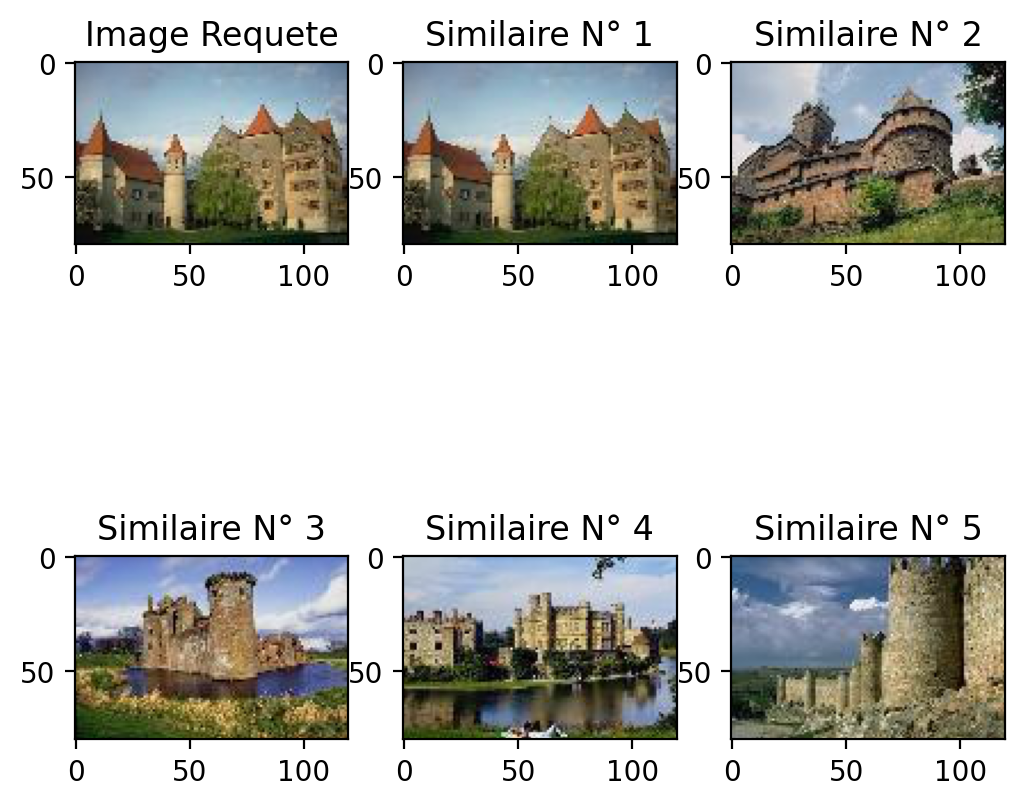

In [ ]:
distanes_CBIR_allFeatures = CBIR_Recherche_allFeatures(img_requete, index_Matrix_allFe)

fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')
for i in range(5):
    ax1 = fig.add_subplot(2, 3, i+2)
    ax1.imshow(loaded_images[distanes_CBIR_allFeatures[i][1]])
    print(distanes_CBIR_allFeatures[i])
    ax1.set_title('Similaire N° %s' %(i+1))

<h2>Recherche par Texture</h2>

(80, 120, 3)
(80, 120)


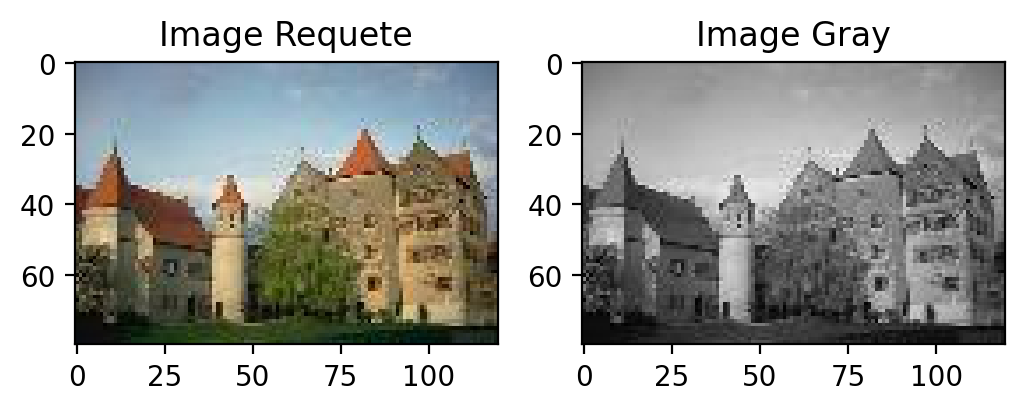

In [ ]:
img_requete = image.imread('/content/drive/MyDrive/Image Mining/ImageRequete.jpeg')
img_requete_gray = cv2.cvtColor(img_requete, cv2.COLOR_RGB2GRAY)

fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(img_requete_gray, cmap='gray', vmin=0, vmax=255)
ax2.set_title('Image Gray')
print(img_requete.shape)
print(img_requete_gray.shape)

<h2>Co-ocurrence Matrix</h2>

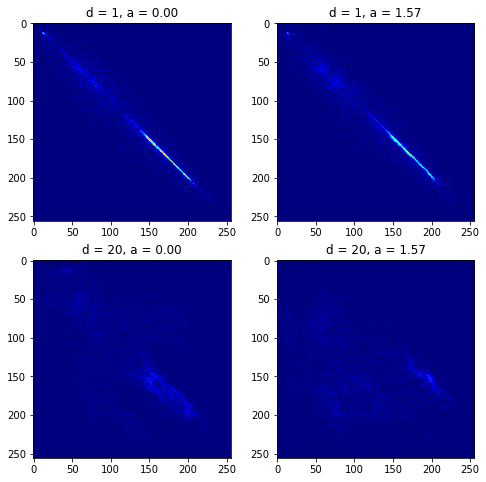

In [ ]:
from skimage import exposure
from skimage.exposure import match_histograms
from skimage.feature import greycomatrix

dis = [1,20]
angle = [0,np.pi/2]

co_mat2 = greycomatrix(img_requete_gray, dis, angle).astype('float')
plt.figure(figsize=(8,8))
i=1
for idd, d in enumerate(dis):
    for ida, a in enumerate(angle):
        co = co_mat2[:,:,idd,ida]
        plt.subplot(2,2,i)
        plt.imshow(co, vmin=co_mat2.min(), vmax=co_mat2.max(), cmap=plt.cm.jet)
        plt.title('d = %d, a = %.2f' %(d, a))
        i += 1
plt.show()

In [ ]:
def log_zer(M):
    M2 = M.copy()
    M2[M==0] = 0.1
    return np.log(M2)

def get_co_occurrence(img, dx, dy):
    co_matx = np.zeros((256,256))
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    for x in range(img_gray.shape[0]-dx):
        for y in range(img_gray.shape[1]-dy):
            i = img_gray[x, y]
            j = img_gray[x+dx, y+dy]
            co_matx[i, j] += 1
    return co_matx/(256*256)

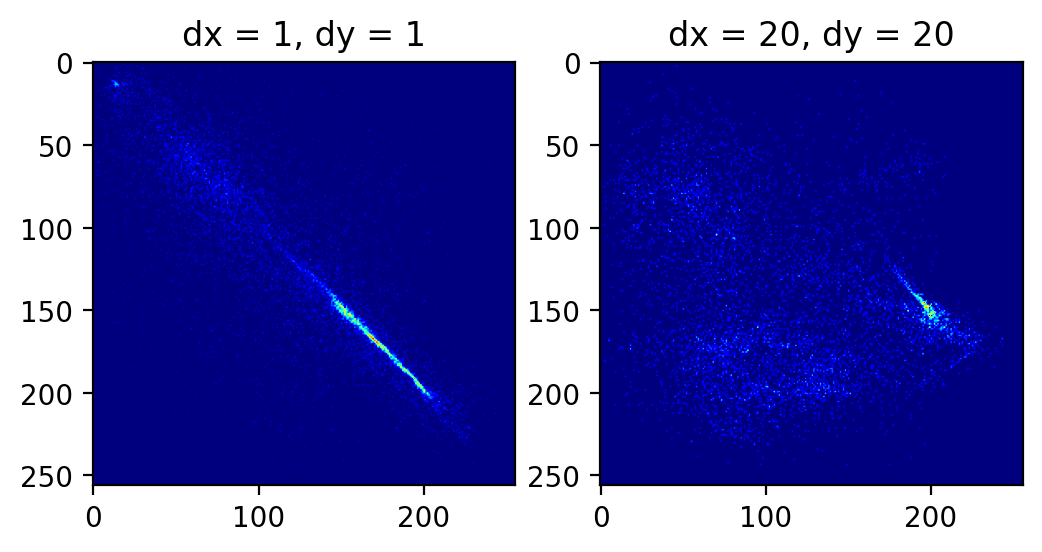

Text(0.5, 1.0, 'Histogram for gray scale image')

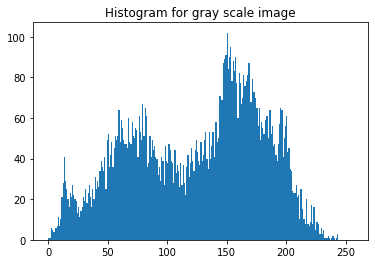

In [ ]:
co_mat = get_co_occurrence(img_requete, 1, 1)
co_mat_dis = get_co_occurrence(img_requete, 20, 20)
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(co_mat, cmap=plt.cm.jet)
ax1.set_title('dx = 1, dy = 1')
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(co_mat_dis, cmap=plt.cm.jet)
ax2.set_title('dx = 20, dy = 20')
plt.show()
plt.hist(img_requete_gray.ravel(),256,[0,256])
plt.title('Histogram for gray scale image')

In [ ]:
def get_texture_features(img):
    mr, mc, vr, vc = (0,0,0,0)
    corr, contrast, eng, homog = (0,0,0,0)
    M = get_co_occurrence(img, 5, 5)
    
    for i in range(len(M)):
        for j in range(len(M[0])):
            mr += M[i,j]*i
            mc += M[i,j]*j
            
    for i in range(len(M)):
        for j in range(len(M[0])):
            vr += ((i-mr)**2)*M[i,j]
            vc += ((j-mc)**2)*M[i,j]
            
    for i in range(len(M)):
        for j in range(len(M[0])):
            corr += (i-mr)*(j-mc)*M[i,j]/np.sqrt(vr*vc)
            contrast += np.power((i-j),2)*M[i,j]/256
            eng += M[i,j]**2
            homog += M[i,j]/(1+np.abs(i-j))
    
    return [corr, contrast, eng, homog]


In [ ]:
def concat_texture_Features(img):
    col_Feat = color_Moments(img)
    hist_Feat = vect_desc_his(img)
    textur_Feat = get_texture_features(img)
    feat = []
    for i in col_Feat:
        feat.append(i)
    for i in hist_Feat:
        feat.append(i)
    for i in textur_Feat:
        feat.append(i)
    return feat

In [ ]:
print(concat_texture_Features(img_requete))
print(len(concat_texture_Features(img_requete)))

[123.77979166666667, 52.45871440116761, 126.5609375, 55.787310339848, 114.24333333333334, 71.32690701193239, 3568.0, 379.0, 2263.0, 3344.0, 25.0, 21.0, 0.0, 0.0, 287.0, 474.0, 832.0, 1571.0, 1931.0, 880.0, 877.0, 711.0, 539.0, 459.0, 332.0, 228.0, 130.0, 79.0, 62.0, 208.0, 121.0, 264.0, 315.0, 538.0, 744.0, 693.0, 652.0, 457.0, 433.0, 599.0, 1022.0, 1326.0, 1268.0, 995.0, 146.0, 27.0, 0.9275382420507468, 1.141543984413147, 4.14741225540638e-06, 0.011357973271041284]
50


In [ ]:
def CBIR_Indexation_texture_Features():
    texture_Features = list()
    
    imgFeat = []
    for ele in loaded_images:
        imgFeat = concat_texture_Features(ele)
        texture_Features.append(imgFeat)
    return texture_Features

In [ ]:
index_Matrix_texture_Fe = CBIR_Indexation_texture_Features()
row = len(index_Matrix_texture_Fe)
column = len(index_Matrix_texture_Fe[0])
print(f'({row}, {column})')

(270, 50)


In [ ]:
def CBIR_Recherche_texture_Features(Imreq, index_Matrix_texture_Fe):
    allDistances = list()
    text_Features = concat_texture_Features(Imreq)
    for im in index_Matrix_texture_Fe:
        d = dist.euclidean(text_Features, im)
        allDistances.append((d, index_Matrix_texture_Fe.index(im)))
    allDistances.sort()
    return allDistances

(0.0, 66)
(1830.7185433530344, 61)
(2027.1496058705272, 113)
(2354.1493584526847, 108)
(2377.391596813661, 211)


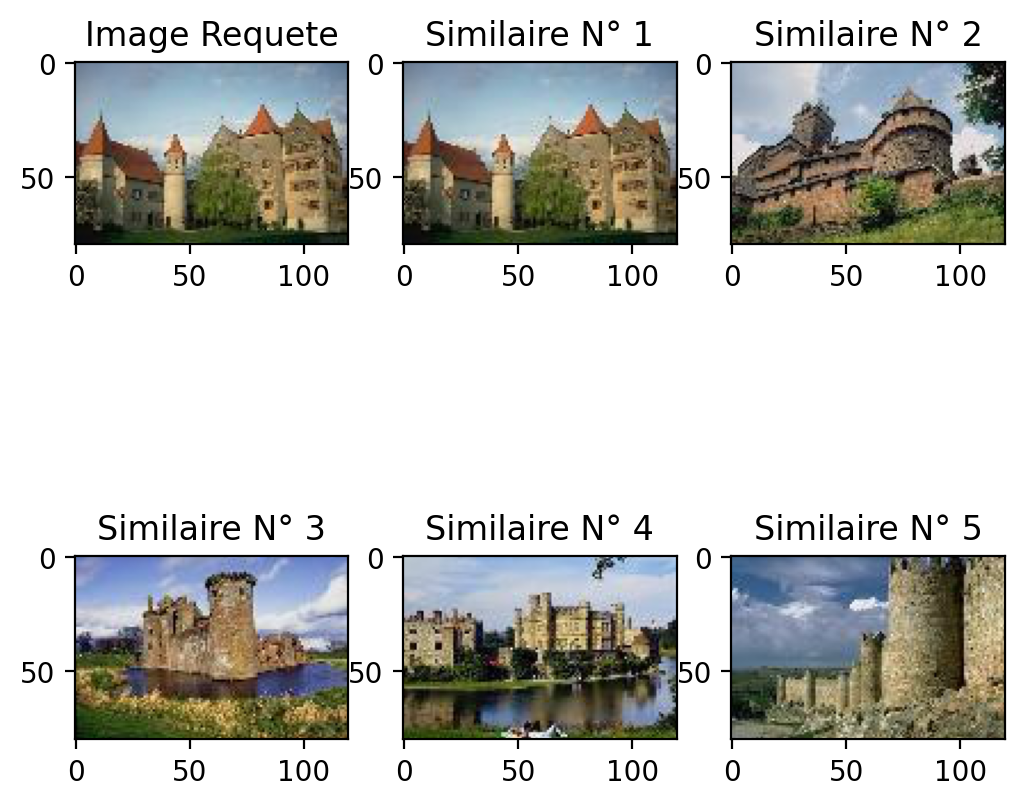

In [ ]:
distanes_CBIR_text_Features = CBIR_Recherche_texture_Features(img_requete, index_Matrix_texture_Fe)

fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')
for i in range(5):
    ax1 = fig.add_subplot(2, 3, i+2)
    ax1.imshow(loaded_images[distanes_CBIR_text_Features[i][1]])
    print(distanes_CBIR_text_Features[i])
    ax1.set_title('Similaire N° %s' %(i+1))

<h2>Recherche Par Forme</h2>

In [ ]:
def n_pq(img, p, q):
    Ig = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    r, c = Ig.shape
    
    M00 = sum(sum(Ig))
    M10, M01 = (0,0)
    for x in range(r-1):
        for y in range(c-1):
            M10 += x * Ig[x+1, y+1]
            M01 += y * Ig[x+1, y+1]
            
    x_prim = M10/M00
    y_prim = M01/M00
    
    Mu_pq = 0
    for x in range(r-1):
        X = x - x_prim
        for y in range(c-1):
            Y = y - y_prim
            Mu_pq += (X**p)*(Y**q)*Ig[x+1, y+1]
            
    gama = 1 + (p+q)/2
    N_pq = Mu_pq/(M00**gama)
    return N_pq

In [ ]:
def get_forme_features(img):
    n02 = n_pq(img,0,2)
    n03 = n_pq(img,0,3)
    n11 = n_pq(img,1,1)
    n12 = n_pq(img,1,2)
    n20 = n_pq(img,2,0)
    n21 = n_pq(img,2,1)
    n30 = n_pq(img,3,0)
    
    h1 = n20 + n02
    h2 = (n20 - n02)**2 + 4*n11
    h3 = (n30 - 3*n12)**2 + (3*n21 - n03)**2
    h4 = (n30 + n12)**2 + (n21 + n03)**2
    
    p1 = (n30 - 3*n21)*(n30 + n12)*((n30 + n12)**2 - 3*(n21 + n03)**2)
    p2 = (3*n21 - n03)*(n21 + n03)*(3*(n30 + n12)**2 - (n21 + n03)**2)
    h5 = p1 + p2
    
    h6 = (n20-n02)*((n30+n12)**2 - (n21+n03)**2) + 4*n11*(n30+n12)*(n21+n03)
    
    p3 = (3*n21-n03)*(n21 + n03)*((n30 + n12)**2 - 3*(n21 + n03)**2)
    p4 = (n30 - 3*n12)*(n21 + n03)*(3*(n30 + n12)**2 - (n21 + n03)**2)
    h7 = p3 - p4
    
    feat = [h1, h2, h3, h4, h5, h6, h7]
    feat = feat/np.mean(feat)
    
    return feat

In [ ]:
print(get_forme_features(img_requete))

[4.17555561e-21 1.34254699e-16 6.89835992e-13 6.89962913e-13
 6.26652341e+00 7.60334624e-08 7.33476517e-01]


In [ ]:
def get_all_Features(img):
    col_Feat = color_Moments(img)
    hist_Feat = vect_desc_his(img)
    textur_Feat = get_texture_features(img)
    form_Feat = get_forme_features(img)
    feat = []
    for i in col_Feat:
        feat.append(i)
    for i in hist_Feat:
        feat.append(i)
    for i in textur_Feat:
        feat.append(i)
    for i in form_Feat:
        feat.append(i)
    return feat

In [ ]:
print(get_all_Features(img_requete))
print(len(get_all_Features(img_requete)))

[123.77979166666667, 52.45871440116761, 126.5609375, 55.787310339848, 114.24333333333334, 71.32690701193239, 3568.0, 379.0, 2263.0, 3344.0, 25.0, 21.0, 0.0, 0.0, 287.0, 474.0, 832.0, 1571.0, 1931.0, 880.0, 877.0, 711.0, 539.0, 459.0, 332.0, 228.0, 130.0, 79.0, 62.0, 208.0, 121.0, 264.0, 315.0, 538.0, 744.0, 693.0, 652.0, 457.0, 433.0, 599.0, 1022.0, 1326.0, 1268.0, 995.0, 146.0, 27.0, 0.9275382420507468, 1.141543984413147, 4.14741225540638e-06, 0.011357973271041284, 4.175555607202473e-21, 1.3425469869253225e-16, 6.898359916707129e-13, 6.899629134838836e-13, 6.266523407455115, 7.603346244891384e-08, 0.7334765165100431]
57


In [ ]:
def CBIR_Indexation_all_Features():
    all_Features = list()
    
    imgFeat = []
    for ele in loaded_images:
        imgFeat = get_all_Features(ele)
        all_Features.append(imgFeat)
    return all_Features

In [ ]:
index_Matrix_all_Fe = CBIR_Indexation_all_Features()
row = len(index_Matrix_all_Fe)
column = len(index_Matrix_all_Fe[0])
print(f'({row}, {column})')

(270, 57)


In [ ]:
def CBIR_Recherche_all_Features(Imreq, index_Matrix_all_Fe):
    allDistances = list()
    all_Features = get_all_Features(Imreq)
    for im in index_Matrix_all_Fe:
        d = dist.euclidean(all_Features, im)
        allDistances.append((d, index_Matrix_all_Fe.index(im)))
    allDistances.sort()
    return allDistances

(0.0, 66)
(1830.7193440611973, 61)
(2027.149618554669, 113)
(2354.149709218418, 108)
(2377.3928944612435, 211)


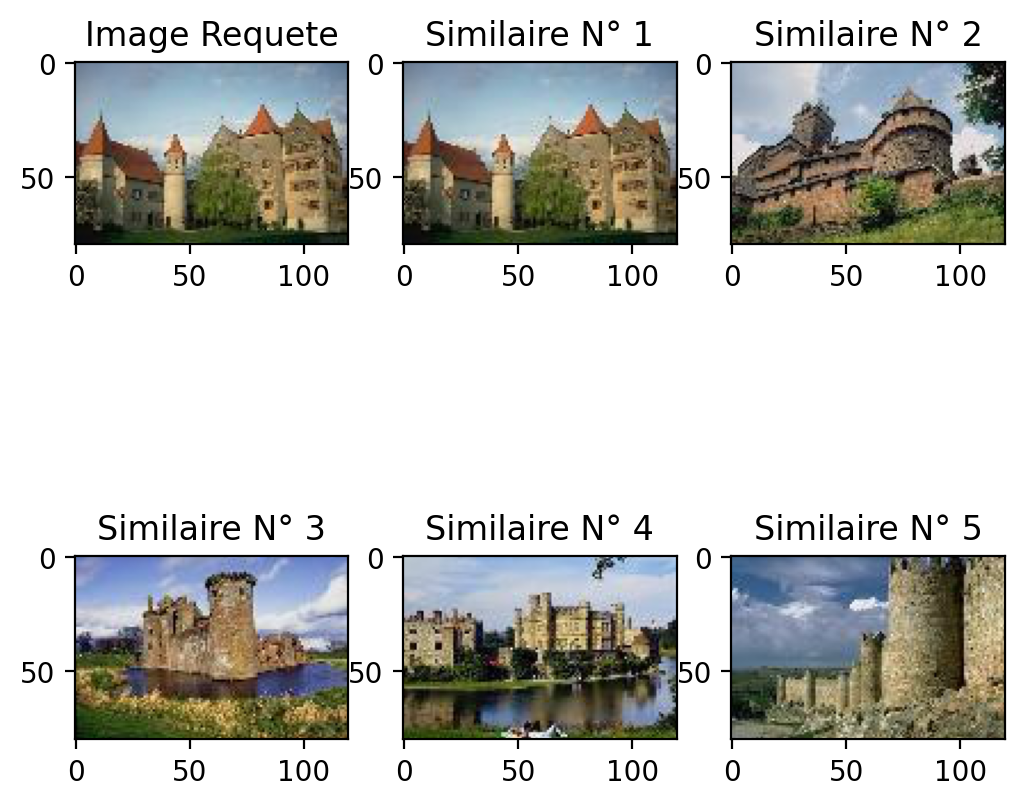

In [ ]:
distanes_CBIR_all_Features = CBIR_Recherche_all_Features(img_requete, index_Matrix_all_Fe)

fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')
for i in range(5):
    ax1 = fig.add_subplot(2, 3, i+2)
    ax1.imshow(loaded_images[distanes_CBIR_all_Features[i][1]])
    print(distanes_CBIR_all_Features[i])
    ax1.set_title('Similaire N° %s' %(i+1))